In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('data/train.csv', index_col='PassengerId')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import re


def parse_des(x):
    x = re.findall(r',\s\w+.', x)
    return (re.findall(r'\w+', str(x)))[0]

data['Name'].apply(parse_des).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Mme           1
Jonkheer      1
Lady          1
Sir           1
Capt          1
Don           1
the           1
Name: Name, dtype: int64

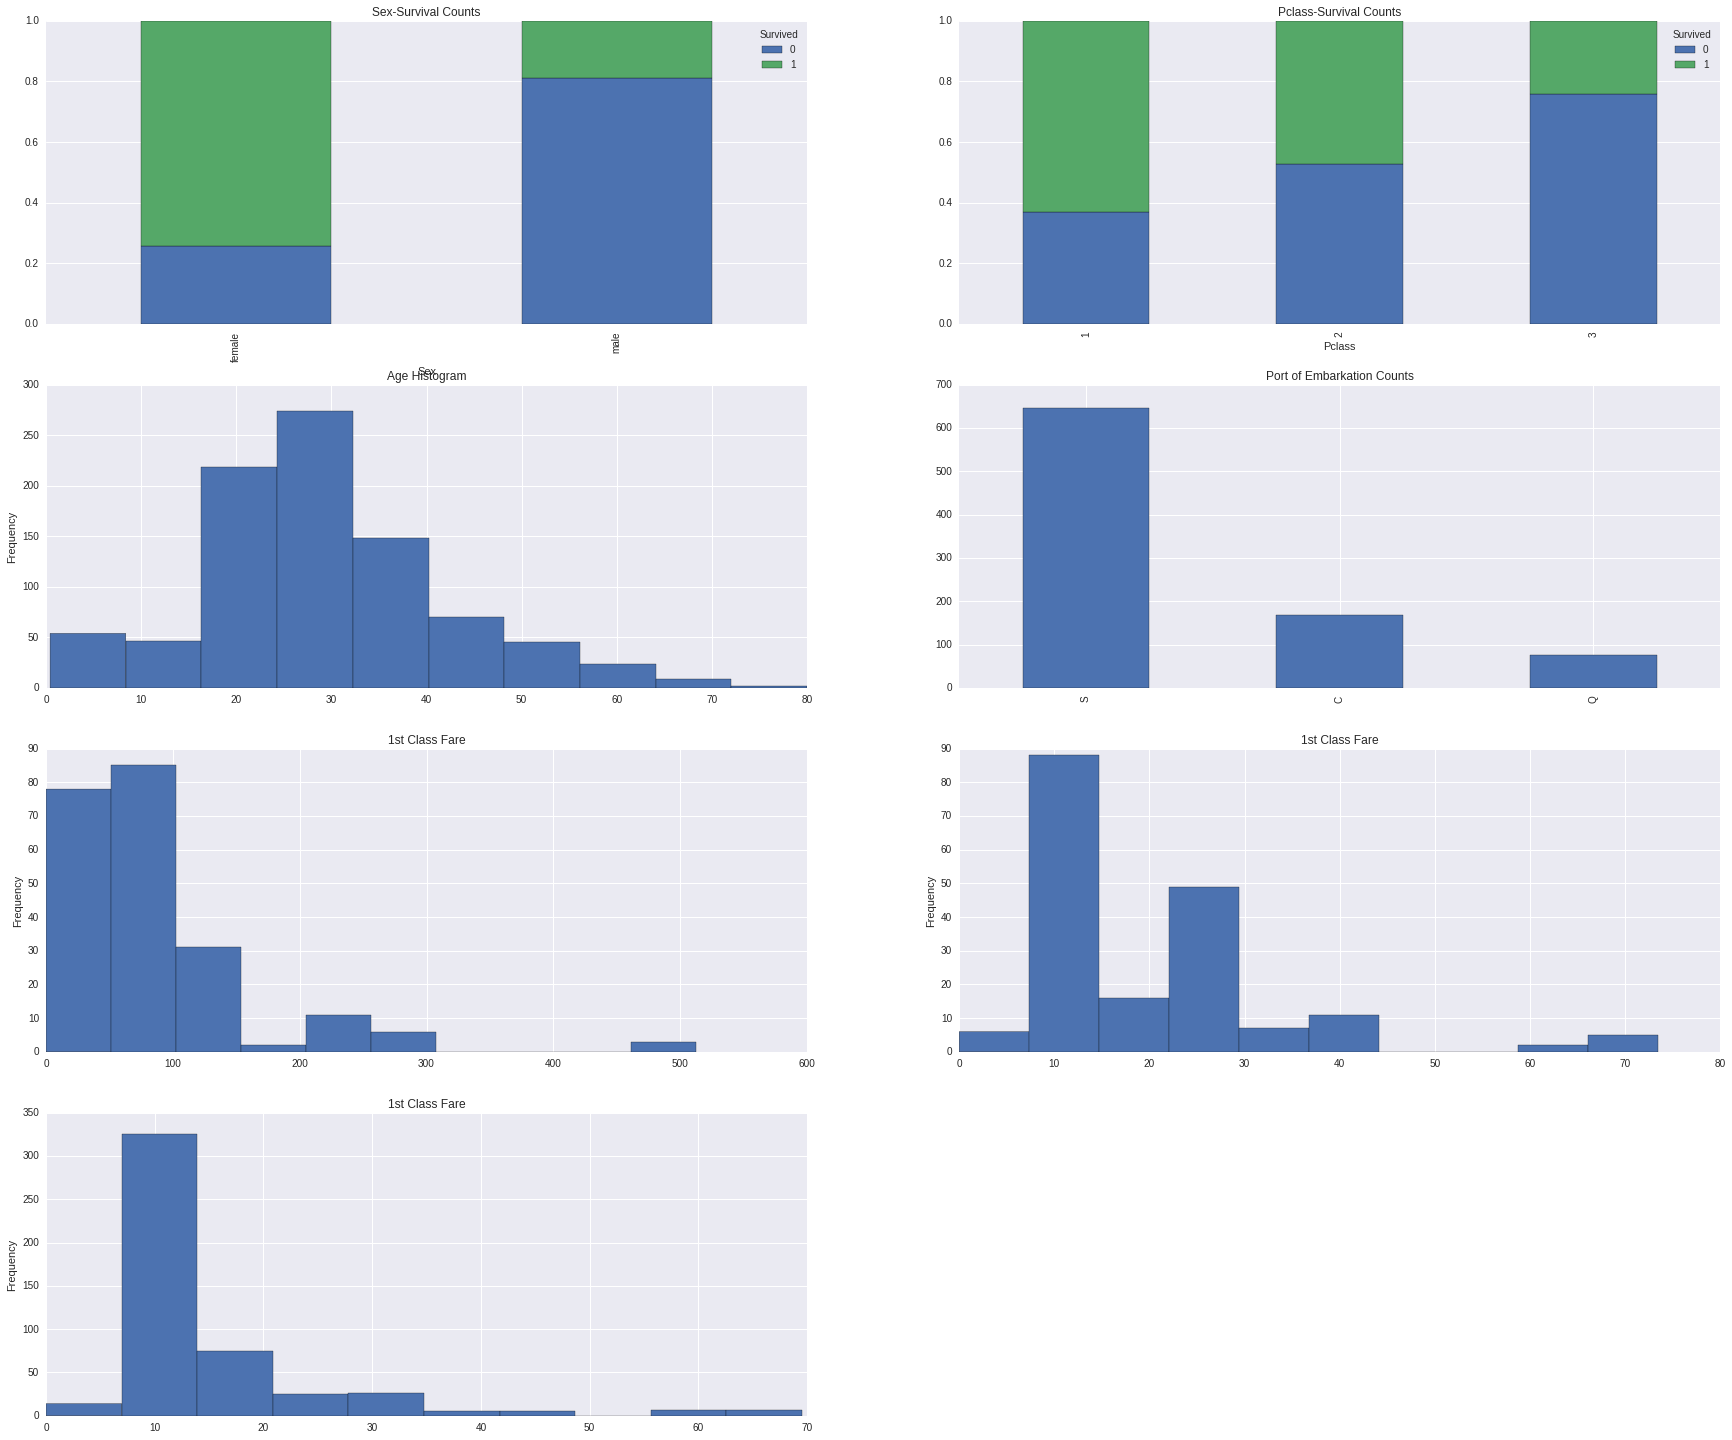

In [68]:
# survived vs non-survived
plt.rc('figure', figsize=(25, 10))
fig = plt.figure(figsize=(30, 25))
fig_dims = (4, 2)

bin_size = 10

# sex-survival plot
ax1 = plt.subplot2grid(fig_dims, (0, 0))
sex_group = data.groupby('Sex')['Survived'].value_counts() / data.groupby('Sex')['Survived'].count()
sex_group.unstack().plot(kind='bar', title='Sex-Survival Counts', stacked=True, ax=ax1)

# pclass-survival plot
ax2 = plt.subplot2grid(fig_dims, (0, 1))
pclass_group = data.groupby('Pclass')['Survived'].value_counts() / data.groupby('Pclass')['Survived'].count()
pclass_group.unstack().plot(kind='bar', title='Pclass-Survival Counts', stacked=True, ax=ax2)

# age histogram
ax3 = plt.subplot2grid(fig_dims, (1, 0))
data['Age'].plot(kind='hist', title='Age Histogram', bins=10, ax=ax3)

# port of embarkation counts
ax4 = plt.subplot2grid(fig_dims, (1, 1))
data['Embarked'].value_counts().plot(kind='bar', title='Port of Embarkation Counts', ax=ax4)

# visualize histogram of Fare
ax5 = plt.subplot2grid(fig_dims, (2, 0))
data.loc[data['Pclass'] == 1, 'Fare'].plot(kind='hist', title='1st Class Fare', ax=ax5)

ax6 = plt.subplot2grid(fig_dims, (2, 1))
data.loc[data['Pclass'] == 2, 'Fare'].plot(kind='hist', title='1st Class Fare', ax=ax6)

ax7 = plt.subplot2grid(fig_dims, (3, 0))
data.loc[data['Pclass'] == 3, 'Fare'].plot(kind='hist', title='1st Class Fare', ax=ax7)

In [42]:
from sklearn.preprocessing import LabelEncoder

# sex_le = LabelEncoder()
# sex_le.fit(data['Sex'])
# # print('classes_', sex_le.classes_)
# sex_le.transform(data['Sex'])
# data['Sex'] = sex_le.transform(data['Sex'])
# # print(data['Sex'])
# print(sex_le.inverse_transform([0, 1]))

In [43]:
p_classes = data['Pclass'].unique()
print(p_classes)

for p_class in p_classes:
    print('M: ', p_class, len(data[(data['Sex'] == 'male') & 
                                   (data['Pclass'] == p_class)]))
    print('F: ', p_class, len(data[(data['Sex'] == 'female') &
                                   (data['Pclass'] == p_class)]))

[3 1 2]
M:  3 347
F:  3 144
M:  1 122
F:  1 94
M:  2 108
F:  2 76


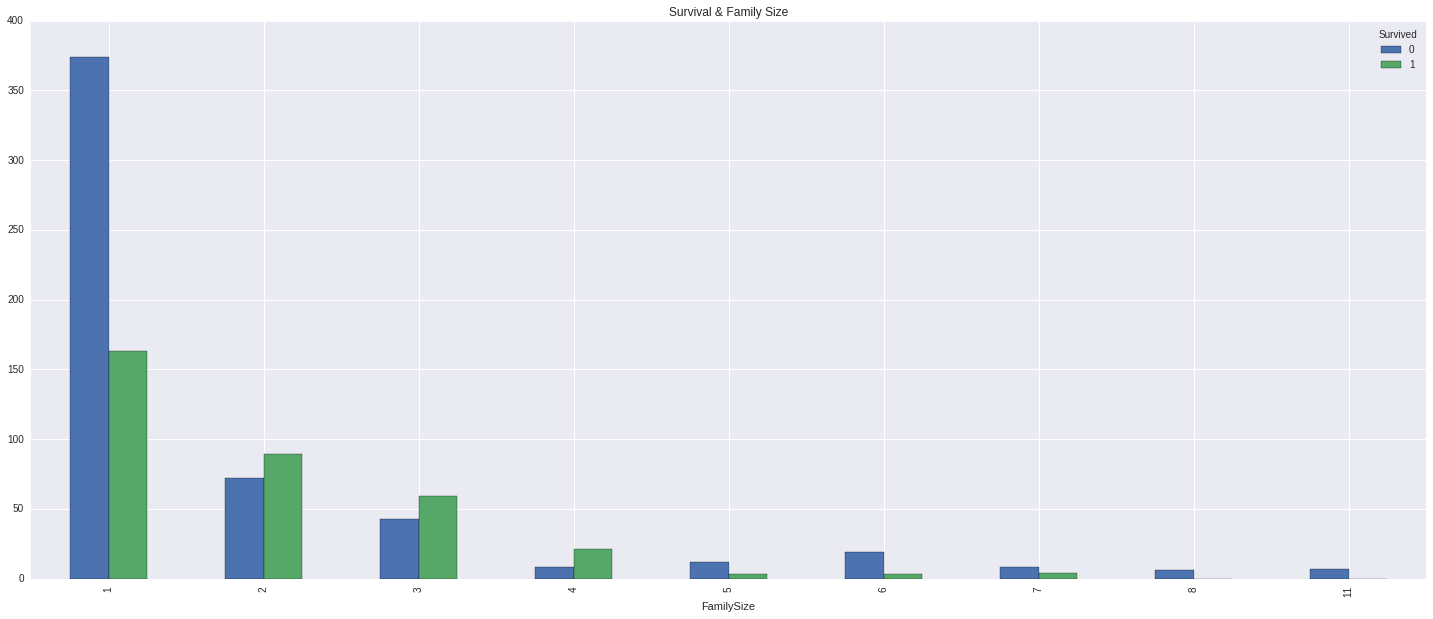

In [8]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

group = pd.crosstab(data['FamilySize'], data['Survived'])

group.plot(kind='bar', title='Survival & Family Size', figsize=(25, 10))

Ah hah. We can see that there’s a survival penalty to singletons and those with family sizes above 4. We can collapse this variable into three levels which will be helpful since there are comparatively fewer large families. Let’s create a discretized family size variable.

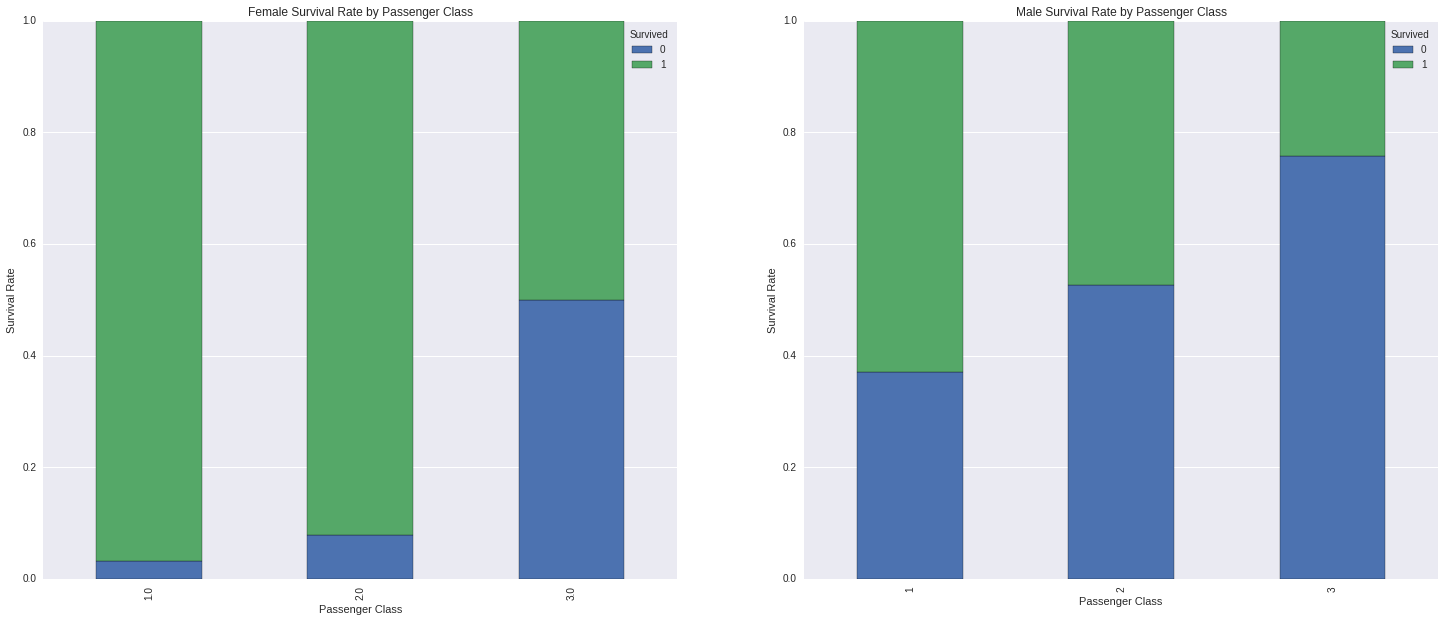

In [44]:
fig_dims = (1, 2)

females_df = data[data['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], data['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)

males_df = data[data['Sex'] == 'male']
males_xt = pd.crosstab(data['Pclass'], data['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)

ax1 = plt.subplot2grid(fig_dims, (0, 0))
females_xt_pct.plot(kind='bar', stacked=True, ax=ax1,
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

ax2 = plt.subplot2grid(fig_dims, (0, 1))
males_xt_pct.plot(kind='bar', stacked=True, ax=ax2,
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

Since the majority of passengers embarked from port S. We assign the missing Embarked values to 'S'.

['S' 'C' 'Q']


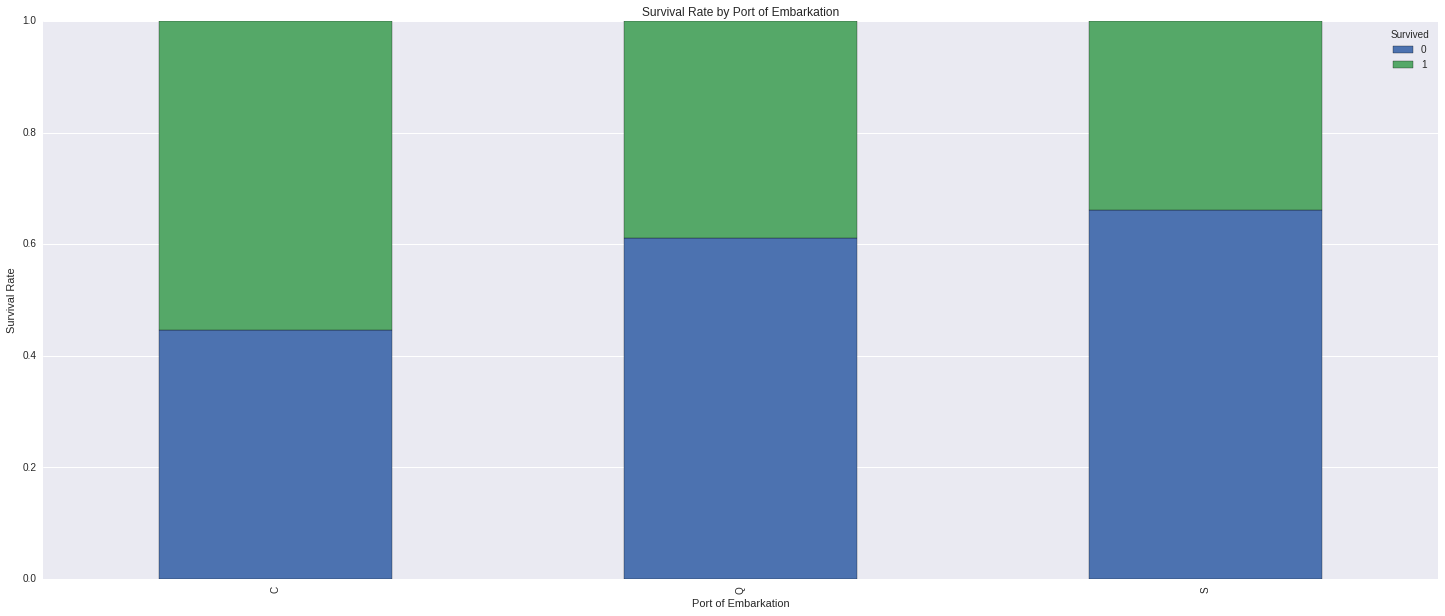

In [45]:
data[data['Embarked'].isnull()]
data.loc[data['Embarked'].isnull(), 'Embarked'] = 'S'

embarked_xt = pd.crosstab(data['Embarked'], data['Survived'])
embarked_xt_pct = embarked_xt.div(embarked_xt.sum(1).astype(float), axis=0)
embarked_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

len(data[data['Embarked'].isnull()])
print(data['Embarked'].unique())

In [46]:
print(data[data['Age'].isnull()][['Sex', 'Pclass', 'Age']].head())

data['Age'].describe()
# print(data['Age'].groupby([data['Sex'], data['Pclass']]).describe())
data['Age'] = data['Age'].groupby([data['Sex'], data['Pclass']]).apply(lambda x: x.fillna(x.median()))

                Sex  Pclass  Age
PassengerId                     
6              male       3  NaN
18             male       2  NaN
20           female       3  NaN
27             male       3  NaN
29           female       3  NaN


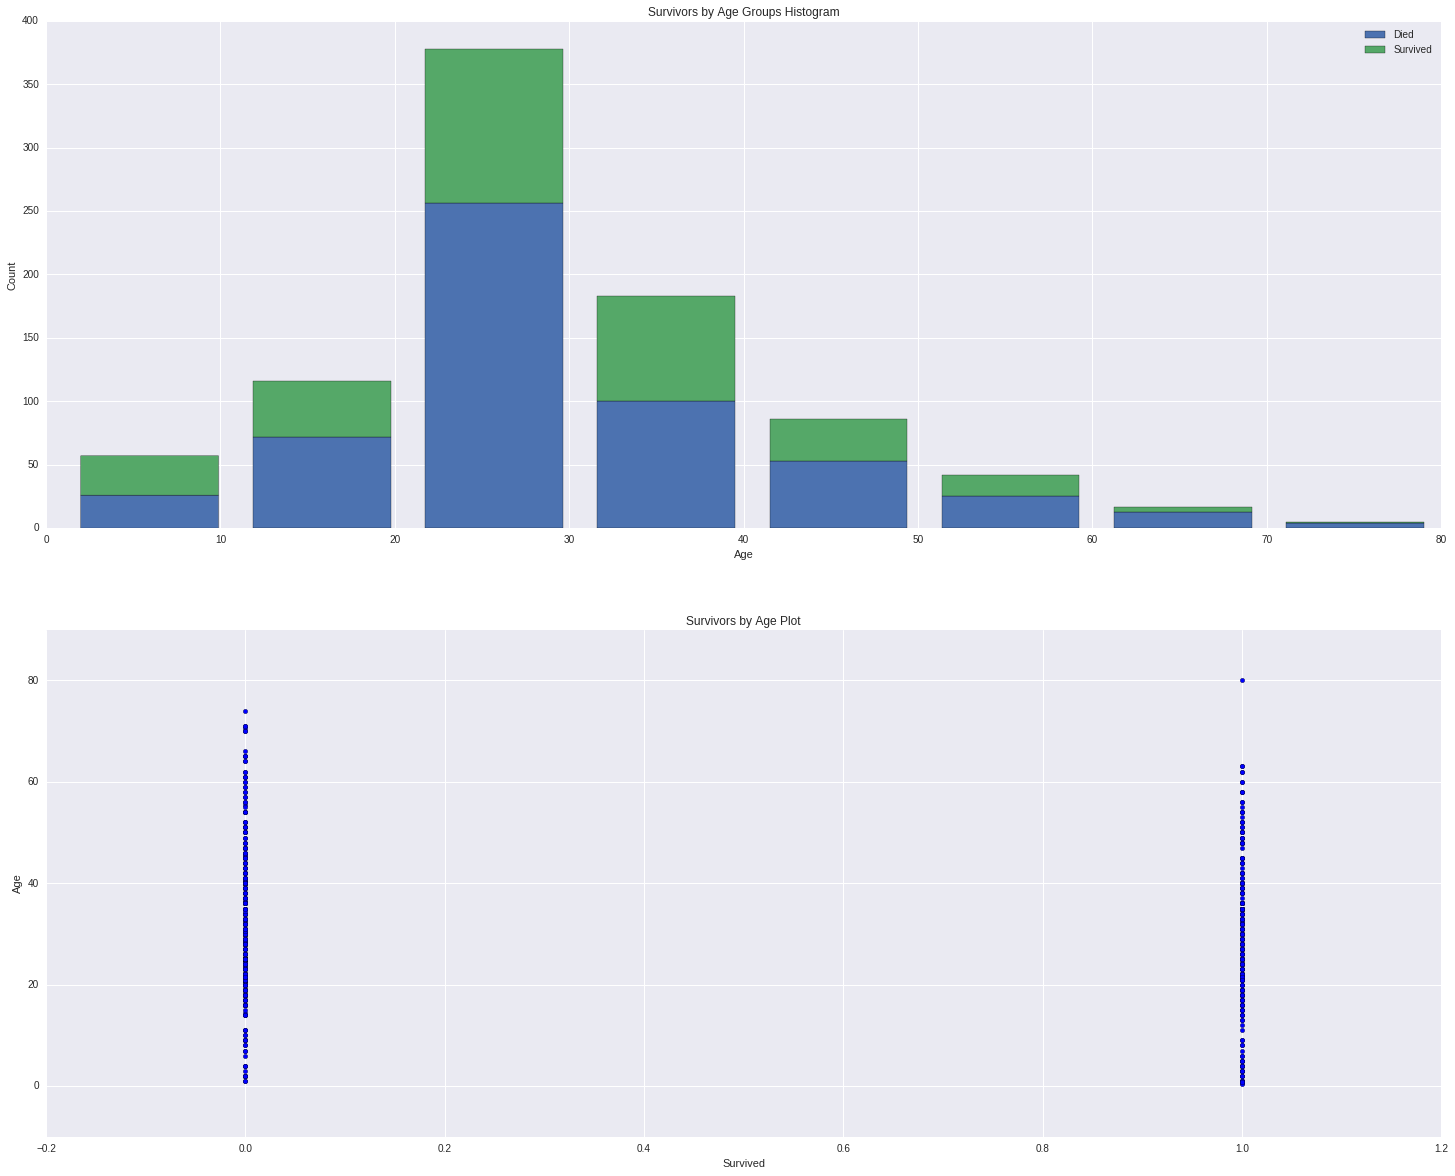

In [47]:
# set up a grid of plots

bin_size = 10
fig, axes = plt.subplots(2, 1, figsize=(25, 20))
df1 = data[data['Survived'] == 0]['Age']
df2 = data[data['Survived'] == 1]['Age']
max_age = max(data['Age'])

axes[0].hist([df1, df2], 
             bins=max_age / bin_size, 
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(data['Survived'], data['Age'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

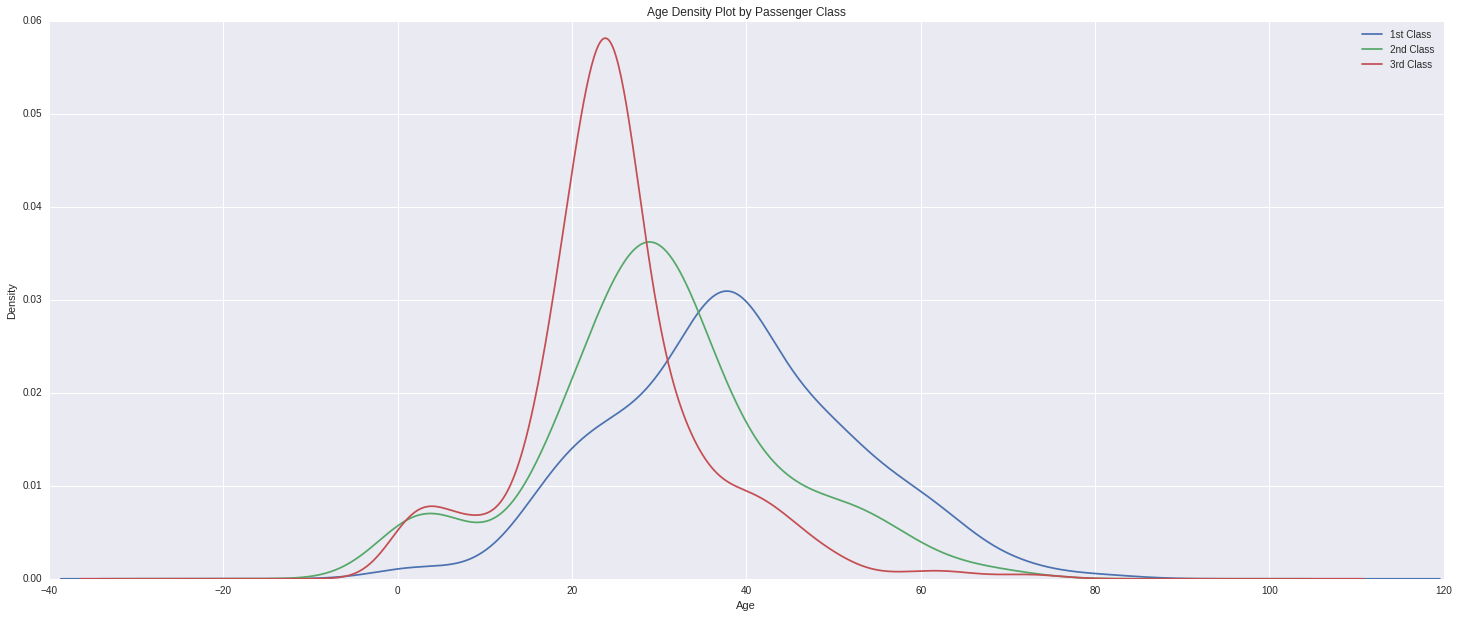

In [48]:
for p_class in np.sort(p_classes):
    data['Age'][data['Pclass'] == p_class].plot(kind='density')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

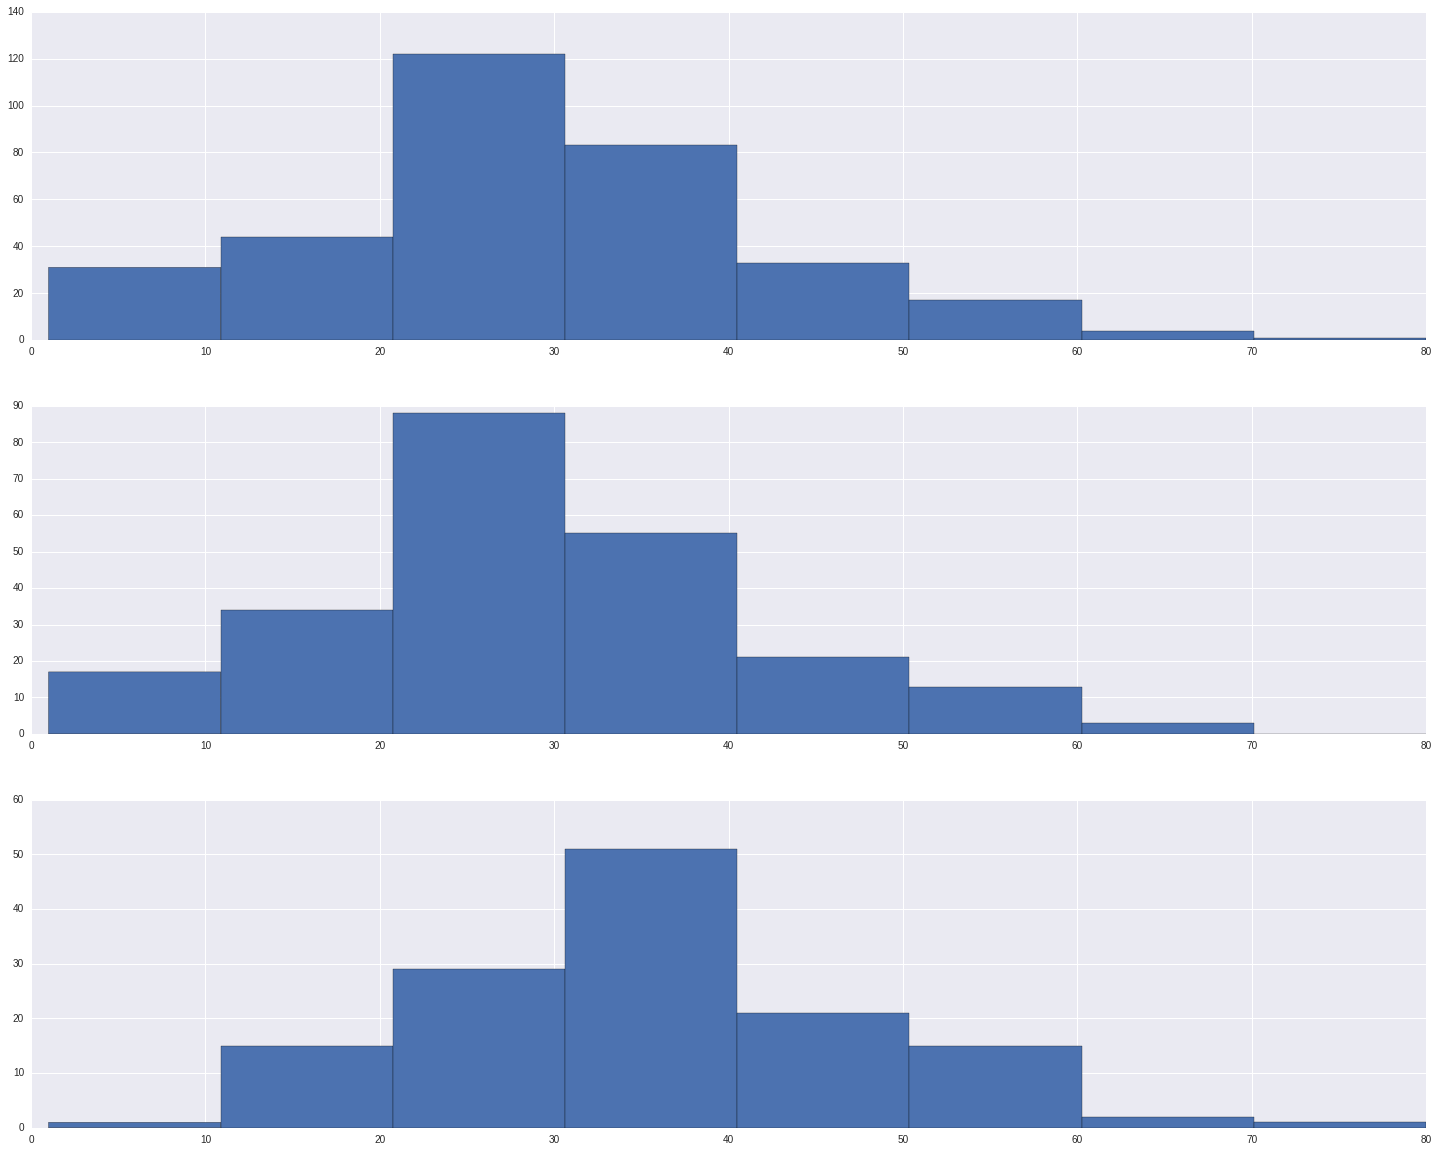

In [49]:
# Set up a grid of plots
fig = plt.figure(figsize=(25, 20)) 
fig_dims = (3, 1)

# Plot the Age histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = data[data['Survived'] == 1]
survived_df['Age'].hist(bins=max_age/bin_size, range=(1, max_age))

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]
females_df['Age'].hist(bins=max_age/bin_size, range=(1, max_age))

# Plot the Age histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = data[(data['Pclass'] == 1) & (data['Survived'] == 1)]
class1_df['Age'].hist(bins=max_age/bin_size, range=(1, max_age))

<b>Family Size</b>
<p>Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses)</p>

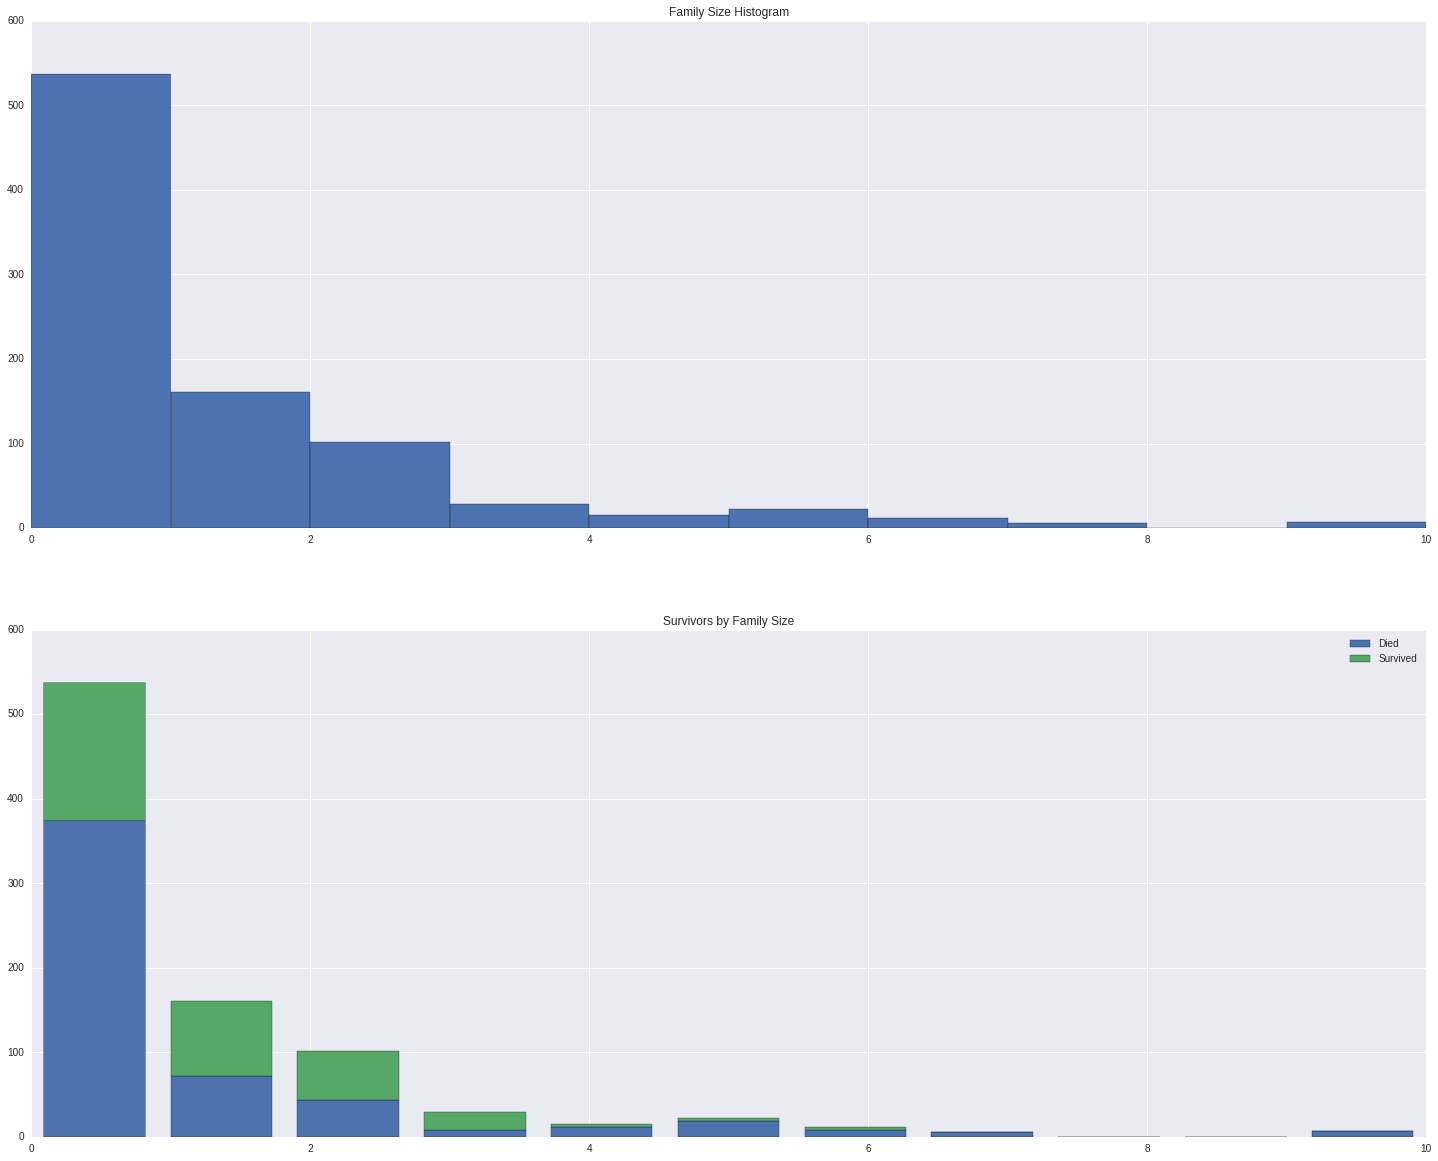

In [50]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data['FamilySize'].head()

fig = plt.figure(figsize=(25, 20)) 
fig_dims = (2, 1)

plt.subplot2grid(fig_dims, (0, 0))
data['FamilySize'].hist()
plt.title('Family Size Histogram')


# Get the unique values of Embarked and its maximum
family_sizes = sorted(data['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = data[data['Survived'] == 0]['FamilySize']
df2 = data[data['Survived'] == 1]['FamilySize']
plt.subplot2grid(fig_dims, (1, 0))
plt.hist([df1, df2], 
         bins=family_size_max+1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')